In [1]:
import tensorflow as tf
from tensorflow.python.framework import graph_util
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMAGE_HEIGHT = 150
IMAGE_WIDTH = 200
IMAGE_CHANNEL = 3

CONV_SIZE = 3
CONV_DEPTH = 3

In [3]:
x = tf.placeholder(tf.float32, [None, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNEL], name="x")
weight = tf.Variable(
    tf.random_uniform(shape=[CONV_SIZE, CONV_SIZE, IMAGE_CHANNEL, CONV_DEPTH], minval=0, maxval=0.1), 
    name="weight")
conv = tf.nn.conv2d(x, weight, strides=[1, 1, 1, 1], padding="SAME")
output = tf.identity(conv, name="output")

In [4]:
print(x, output)

Tensor("x:0", shape=(?, 150, 200, 3), dtype=float32) Tensor("output:0", shape=(?, 150, 200, 3), dtype=float32)


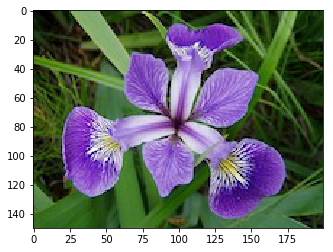

In [5]:
img = plt.imread("iris.jpg")
plt.imshow(img)

INFO:tensorflow:Froze 1 variables.
Converted 1 variables to const ops.


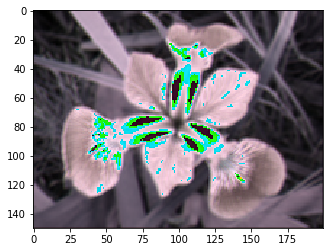

In [6]:
img_reshaped = img.reshape((1, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNEL))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_value = sess.run(output, feed_dict={x: img_reshaped})
    out_image = output_value.reshape((IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNEL)).astype(np.uint8)
    plt.imshow(out_image)
    
    graph_def = tf.get_default_graph().as_graph_def()
    output_graph = graph_util.convert_variables_to_constants(sess, graph_def, ["output"])
    with tf.gfile.GFile("./conv_var_input.pb", "wb") as f:
        f.write(output_graph.SerializeToString())
    # print(out_image)

```
TENSORFLOW_REPO_DIR/bazel-bin/tensorflow/contrib/lite/toco/toco  \
  --input_file=conv_var_input.pb \
  --input_format=TENSORFLOW_GRAPHDEF  --output_format=TFLITE \
  --output_file=conv_var_input.tflite --inference_type=FLOAT \
  --input_type=FLOAT --input_arrays=x \
  --output_arrays=output --input_shapes=1,150,200,3
```